In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
# 数据加载器基类，派生出图片加载器和标签加载器
class Loader:
    # 初始化加载器，path为数据文件路经，count为文件中的样本个数
    def __init__(self, path, count):
        self.path = path
        self.count = count

    # 读取文件内容
    def get_file_content(self):
        print(self.path)
        f = open(self.path, 'rb')
        content = f.read()
        f.close()
        return content  # 返回字节数据

In [3]:
# 图像数据加载器
class ImageLoader(Loader):
    # 内部函数，从文件字节数组中获取第index个图像数据，文件中包含所有样本图片数据
    def get_picture(self, content, index):
        start = index * 28 * 28 + 16  # 文件头16个字节，后面每28*28个字节为一个图片数据
        picture = []
        for i in range(28):
            picture.append([])
            for j in range(28):
                byte1 = content[start + i * 28 + j]
                picture[i].append(byte1)  # 在Python3中本来就是int
                # picture[i].append(self.to_int(btye1))
        # print(picture)
        return picture

    # 将图像数据转化成长度为784的行向量形式
    def get_one_sample(self, picture):
        sample = []
        for i in range(28):
            for j in range(28):
                sample.append(picture[i][j])
        # print(sample)
        return sample

    # 加载数据文件，获得全部样本的输入向量，onerow表示是否将每张图片转化为行向量
    # to2表示是否转化为0，1矩阵
    def load(self, onerow=False):
        content = self.get_file_content()  #  获取文件字节数组
        data_set = []
        for index in range(self.count):  # 遍历每个样本
            onepic = self.get_picture(content, index)  # 从样本得到图片数据，返回二维数组
            if onerow:
                onepic = sefl.get_one_sample(onepic)  # 转为一维向量形式
            data_set.append(onepic)
        # print(data_set)
        return data_set

In [4]:
# 标签数据加载器
class LabelLoader(Loader):
    # 加载数据文件，获得全部样本的标签向量
    def load(self):
        content = self.get_file_content()  # 获取文件字节数据
        labels = []
        for index in range(self.count):
            onelabel = content[index + 8]  # 文件头有8个字节
            onelabelvec = self.norm(onelabel)  # one-hot编码
            labels.append(onelabelvec)
        # print(labels)
        return labels

    # one-hot编码，用于将一个值转换为10维标签向量
    def norm(self, label):
        label_vec = []
        # label_value=self.to_int(label)
        label_value = label  # 在Python3中就是int
        for i in range(10):
            if i == label_value:
                label_vec.append(1)
            else:
                label_vec.append(0)
        return label_vec

In [5]:
# 获得训练数据集
def get_training_data_set(num, onerow=False):
    image_loader = ImageLoader('train-images.idx3-ubyte', num)
    label_loader = LabelLoader('train-labels.idx1-ubyte', num)
    return image_loader.load(onerow), label_loader.load()


# 获得测试数据集
def get_test_data_set(num, onerow=False):
    image_loader = ImageLoader('t10k-images.idx3-ubyte', num)
    label_loader = LabelLoader('t10k-labels.idx1-ubyte', num)
    return image_loader.load(onerow), label_loader.load()

In [6]:
# 将一个长度为784的行向量打印成图形的样式
def printimg(onepic):
    onepic = onepic.reshape(28, 28)
    for i in range(28):
        for j in range(28):
            if onepic[i, j] == 0:
                print('  ', end='')
            else:
                print('* ', end='')
        print('')

In [7]:
# 加载训练集，最大样本量为60000
X_train, Y_train = get_training_data_set(60000, False)
# 加载测试集，最大样本量为10000
X_test, Y_test = get_test_data_set(10000, False)

train-images.idx3-ubyte
train-labels.idx1-ubyte
t10k-images.idx3-ubyte
t10k-labels.idx1-ubyte


In [8]:
# 图片数据归一化
X_train = np.array(X_train).astype(bool).astype(float) / 255
X_test = np.array(X_test).astype(bool).astype(float) / 255

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
# 转换成np数组
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [11]:
print(Y_train[0])

[0 0 0 0 0 1 0 0 0 0]


In [16]:
printimg(X_test[999])

                                                        
                                                        
                                                        
                                                        
                                                        
                                                        
                  * * * * * * *                         
                * * * * * * * * *                       
                * * * *     * * * *                     
              * * * *         * * * *                   
              * * *             * * *                   
              * * *             * * *                   
              * *               * * *                   
              * * *             * * *                   
              * * * *           * * * * *               
                * * * *         * * * * *               
                  * * * * * * * * * * * *               
                    * * * * * *

In [17]:
# 添加一个维度，代表图片通道，分别为样本个数，宽度，高度，通道数
# X_train=X_train[:, :, :, np.newaxis]
# X_test=X_test[:, :, :, np.newaxis]

In [18]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [19]:
print('训练集的维度：', X_train.shape, Y_train.shape)
print('测试集的维度：', X_test.shape, Y_test.shape)

训练集的维度： (60000, 28, 28, 1) (60000, 10)
测试集的维度： (10000, 28, 28, 1) (10000, 10)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

Using TensorFlow backend.


In [21]:
# 全局变量
batch_size = 512  # 批处理样本数量
nb_classes = 10  # 分类数目
epochs = 100  # 迭代轮数
img_rows, img_cols = 28, 28  # 图片样本宽高
nb_filters = 32  # 卷积核的个数
pool_size = (2, 2)  # 池化层的大小
kernel_size = (5, 5)  # 卷积核的大小
input_shape = (img_rows, img_cols, 1)  # 输入图片的维度，灰度图片为1个通道

In [22]:
# 构建模型
model = Sequential()
# 卷积层一，深度6，核大小5*5，输入维度28*28，步长为1
model.add(Conv2D(6, kernel_size, input_shape=input_shape, strides=1))
# 池化层一，池大小5*5，步长为2
model.add(AveragePooling2D(pool_size=pool_size, strides=2))
# 卷积层二，深度2，核大小5*5，步长为1
model.add(Conv2D(12, kernel_size=kernel_size, strides=1))
# 池化层二
model.add(AveragePooling2D(pool_size=pool_size, strides=2))
# 拉成一维数据
model.add(Flatten())
# 全链接层，10分类
model.add(Dense(nb_classes))
# 激活函数
model.add(Activation('sigmoid'))

In [23]:
# 编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [24]:
# 训练模型
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 76us/step - loss: 2.3016 - acc: 0.1116 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 2/100
60000/60000 [==============================] - 2s 28us/step - loss: 2.3007 - acc: 0.1124 - val_loss: 2.3001 - val_acc: 0.1135
Epoch 3/100
60000/60000 [==============================] - 2s 27us/step - loss: 2.2996 - acc: 0.1124 - val_loss: 2.2980 - val_acc: 0.1135
Epoch 4/100
60000/60000 [==============================] - 2s 27us/step - loss: 2.2943 - acc: 0.1129 - val_loss: 2.2853 - val_acc: 0.1135
Epoch 5/100
60000/60000 [==============================] - 2s 27us/step - loss: 2.2350 - acc: 0.1995 - val_loss: 2.0660 - val_acc: 0.2847
Epoch 6/100
60000/60000 [==============================] - 2s 27us/step - loss: 1.2705 - acc: 0.6268 - val_loss: 0.8277 - val_acc: 0.7197
Epoch 7/100
60000/60000 [==

In [25]:
# 评估模型
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuary:', score[1])

Test score: 0.3252777906358242
Test accuary: 0.9062


In [27]:
model.save('cnn_model.h5')

In [16]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2

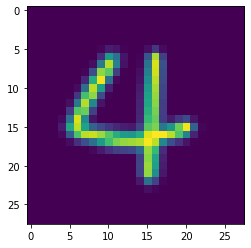

In [18]:
i4 = cv2.imread('4.png', 0)
plt.imshow(i4)

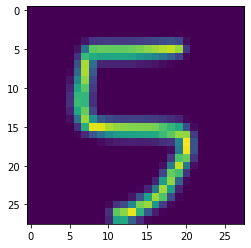

In [19]:
i5 = cv2.imread('5.png', 0)
plt.imshow(i5)

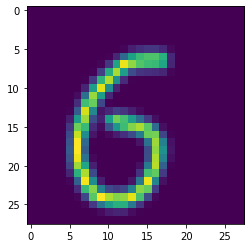

In [20]:
i6 = cv2.imread('6.png', 0)
plt.imshow(i6)

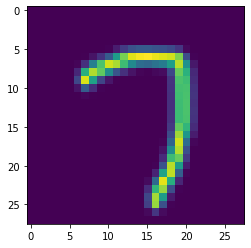

In [21]:
i7 = cv2.imread('7.png', 0)
plt.imshow(i7)

In [24]:
model = load_model('cnn_model.h5')
img_list = [i7, i6, i5, i4]

In [25]:
for img in img_list:
    img = np.reshape(img, (1, 28, 28, 1)).astype(bool).astype('float32') / 255
    my_proba = model.predict_proba(img)
    my_predict = model.predict_classes(img)
    print('识别为：')
    print(my_proba)
    print(my_predict)

识别为：
[[1.5467405e-05 0.0000000e+00 1.0728836e-05 1.9453168e-03 2.9802322e-07
  1.9460917e-05 0.0000000e+00 1.3823211e-03 9.4805800e-06 6.1301151e-05]]
[3]
识别为：
[[1.6748905e-05 0.0000000e+00 2.5033951e-06 1.0848045e-05 3.8743019e-07
  1.0955334e-03 0.0000000e+00 0.0000000e+00 4.4854663e-05 2.6899434e-05]]
[5]
识别为：
[[3.8743019e-07 0.0000000e+00 1.9142032e-04 5.0887465e-04 3.7234724e-03
  3.0279160e-05 3.9637089e-06 0.0000000e+00 7.2856370e-04 8.2767582e-07]]
[4]
识别为：
[[0.0000000e+00 0.0000000e+00 1.1920929e-07 1.4901161e-07 3.9708614e-04
  8.9406967e-08 1.1622906e-06 4.7266483e-05 7.2480708e-07 3.7196351e-04]]
[4]
